In [1]:
import torchvision, torch, numpy as np
import torchvision.datasets as trch_dataset
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\GopiP\AppData\Local\Temp\ipykernel_31152\551604317.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
cdata = trch_dataset.CIFAR10(root='cifar10', download=True)
print(cdata)

Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train


In [3]:
for vl in cdata.__dir__():
    if vl.startswith("_"):
        continue
    exec("val = cdata." + vl)
    print(vl, "||", val)

root || cifar10
transform || None
target_transform || None
transforms || None
train || True
data || [[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [

In [4]:
print(cdata.classes)
print(cdata.data.shape)
print(len(cdata.targets))
print(cdata.class_to_idx)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 32, 32, 3)
50000
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


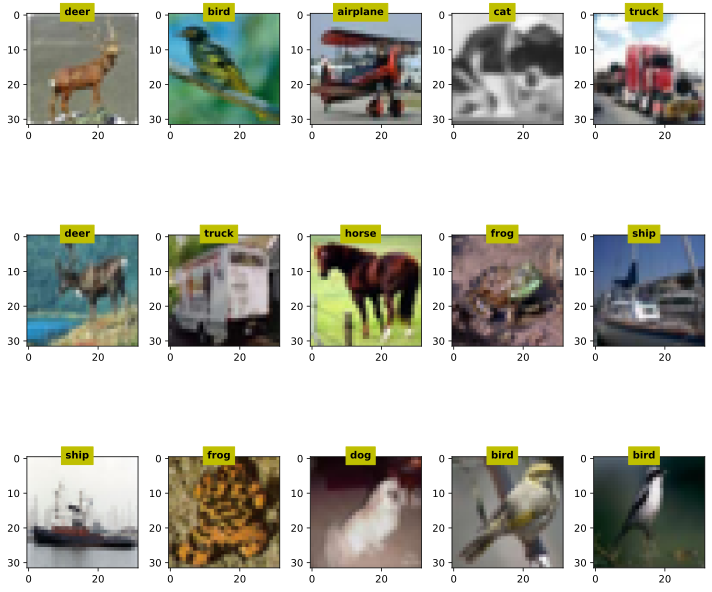

In [5]:
fig, ax = plt.subplots(3, 5, figsize=(10,10))

for ax_ind in ax.flatten():
    rnd_idx = np.random.choice(len(cdata.targets))
    img = cdata.data[rnd_idx]
    labels = cdata.classes[cdata.targets[rnd_idx]]

    ax_ind.imshow(img)
    ax_ind.text(14, 0, labels, ha='center', fontweight='bold', color='k', backgroundcolor='y')
    # ax_ind.set_title(labels)
    # break
plt.tight_layout()
plt.show()

In [6]:
ts = T.Compose([
                T.ToTensor(),
                T.Resize(32 * 4),
                T.Grayscale(num_output_channels=1)
                ])

In [7]:
cdata.transform = ts

In [8]:
transform_method1 = ts(cdata.data[123])
transform_method2 = cdata.transform(cdata.data[123])
print(transform_method1.shape)

torch.Size([1, 128, 128])


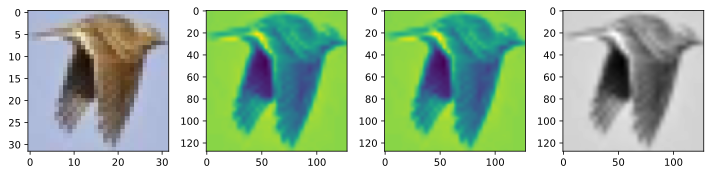

In [17]:
fig, ax = plt.subplots(1,4,figsize=(10,3))

ax[0].imshow(cdata.data[123])
ax[1].imshow(transform_method1.squeeze())
ax[2].imshow(transform_method2.squeeze())
ax[3].imshow(transform_method2.squeeze(), cmap='gray')
plt.tight_layout()
plt.show()

In [32]:
data = np.loadtxt(open("mnist_train_small.csv", 'rb'), delimiter=r',')

In [33]:
# Extract only the first 8
labels = data[:8, 0]
data = data[:8, 1:]

In [34]:
dataNorm = data/np.max(data)

In [35]:
dataNorm = dataNorm.reshape(dataNorm.shape[0], 1, 28, 28)

In [36]:
print(dataNorm.shape)
print(labels.shape)

(8, 1, 28, 28)
(8,)


In [37]:
dataT = torch.Tensor(dataNorm).float()
labelsT = torch.Tensor(labels).long()

In [13]:
class customDataset(Dataset):

    def __init__(self, tensors, transform=None):
        assert all(tensors[0].size(0) == tensor.size(0) for tensor in tensors), "Size mismatch between tensors"
        self.tensors = tensors
        self.transform = transform

    def __getitem__(self, index):
        
        if self.transform:
            x = self.transform(self.tensors[0][index])
        else:
            x = self.tensors[0][index]

        y = self.tensors[1][index]

        return x,y

    def __len__(self):
        return self.tensors[0].size(0)

In [ ]:
img_trans = T.Compose([
                        T.ToPILImage(),
                        T.RandomVerticalFlip(p=0.5),
                        T.ToTensor()
                    ])
train_data = customDataset((dataT, labelsT), img_trans)
dataLoaded = DataLoader(train_data, batch_size=8, shuffle=False)
type(train_data), type(dataLoaded)

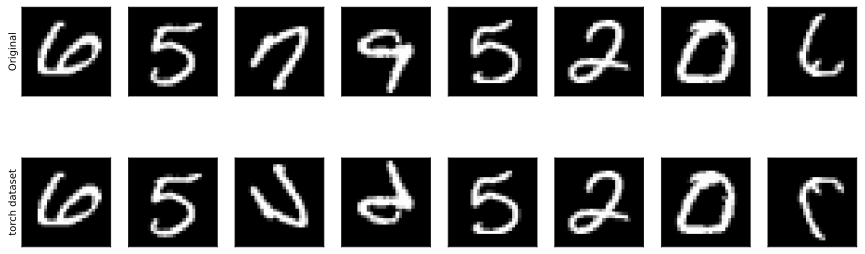

In [62]:
X, y = next(iter(dataLoaded))

fig, ax = plt.subplots(2,8, figsize=(15, 5))

for i in range(len(X)):
    ax[0,i].imshow(dataT[i].squeeze().detach(), cmap='gray') 
    ax[1,i].imshow(X[i].squeeze().detach(), cmap='gray')

    for row in range(2):
        ax[row, i].set_xticks([])
        ax[row, i].set_yticks([])


ax[0,0].set_ylabel('Original')
ax[1,0].set_ylabel('torch dataset')
plt.show()